## TOC

1. [Basic Statistics](#BasicStatistics)<br>
   1.1 [Sideways Moves Allowed](#BasicStatisticsSidewaysAllowed)<br>
   1.2 [Sideways Moves Not allowed](#BasicStatisticsSidewaysNotAllowed)<br>
   1.3 [Sideways Moves Allowed (cached)](#BasicStatisticsSidewaysAllowedCached)<br>
   1.4 [Sideways Moves Not Allowed (cached)](#BasicStatisticsSidewaysNotAllowedCached)<br>
2. [Run Time Diagrams](#RTD)<br>
   2.1 [Sideways Moves Allowed](#RTDSidewaysAllowed)<br>
   2.2 [Sideways Moves Not Allowed](#RTDSidewaysDisallowed)<br>
   2.3 [Sideways Moves Allowed (cached)](#RTDSidewaysCached)<br>
   2.4 [Sideways Moves Not Allowed (cached)](#RTDNoSidewaysCached)<br>
3. [Comparisons of different schemes](#COMP)<br>
   3.1 [Cached vs non-cached, sideways](#cvnc_side)<br>
   3.2 [Cached vs non-cached, no sideways](#cvnc_nside)<br>
   3.3 [Sideways vs non-Sideways, no Cache](#side_vs_no_side_nc)<br>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
plt.rcParams["figure.figsize"] = [15, 5]

### List of Files for each type of run (cached/uncached vs sideways-allowed/sideways-not-allowed)

In [2]:
no_sideways_no_cache = {
    50: "no_sideways_no_cache_50.csv",
    100: "no_sideways_no_cache_100.csv",
    250: "no_sideways_no_cache_250.csv",
    500: "no_sideways_no_cache_500.csv",
    1000: "no_sideways_no_cache_1000.csv",
    10000: "no_sideways_no_cache_10000.csv",
    100000: "100_no_sideways_no_cache_early.csv",}

no_sideways_yes_cache = {
    50: "no_sideways_cache_50.csv",
    100: "no_sideways_cache_100.csv",
    250: "no_sideways_cache_250.csv",
    500: "no_sideways_cache_500.csv",
    1000: "no_sideways_cache_1000.csv",
    10000: "no_sideways_cache_10000.csv",
    100000: "100_no_sideways_cache_early.csv",}

yes_sideways_no_cache = {
    100000: "100_sideways_no_cache_100000.csv",
    10000: "yes_sideways_no_cache_r10000.csv",
    2500: "yes_sideways_no_cache_10000.csv",
    1000: "yes_sideways_no_cache_1000.csv",
    500: "yes_sideways_no_cache_500.csv",
    250: "yes_sideways_no_cache_250.csv",
    100: "yes_sideways_no_cache_100.csv",
    50: "yes_sideways_no_cache_50.csv",
}

yes_sideways_yes_cache = {
    100000: "100_sideways_cache_100000.csv",
    10000: "yes_sideways_cache_r10000.csv",
    2500: "yes_sideways_cache_10000.csv",
    1000: "yes_sideways_cache_1000.csv",
    500: "yes_sideways_cache_500.csv",
    250: "yes_sideways_cache_250.csv",
    100: "yes_sideways_cache_100.csv",
    50: "yes_sideways_cache_50.csv"
}

<a id="section_ID"></a>

## Basic Statistics <a id="BasicStatistics"></a>

In [33]:
def fill_stats_helper(d:dict, val:float, name:str):
    if name not in d.keys():
        d[name] = []
    d[name].append(val)

def fill_statistics(filename:str, column:str, out_dict:dict, iterations:int, multiplication_factor:int=1):
    df = pd.read_csv(filename)
    df = df[df['Cost'] == 0]
    df = df[[column]]
    data = df[column].to_numpy()
    data = data * multiplication_factor
    
    fill_stats_helper(out_dict, iterations, 'iterations')
    fill_stats_helper(out_dict, np.min(data), 'min')
    fill_stats_helper(out_dict, np.max(data), 'max')
    fill_stats_helper(out_dict, np.mean(data), 'mean')
    fill_stats_helper(out_dict, np.std(data), 'std')
    fill_stats_helper(out_dict, np.std(data)/np.mean(data), 'cv')
    fill_stats_helper(out_dict, np.median(data), 'median')
    fill_stats_helper(out_dict, np.quantile(data, 0.25), 'q0.25')
    fill_stats_helper(out_dict, np.quantile(data, 0.75), 'q0.75')
    fill_stats_helper(out_dict, np.quantile(data, 0.1), 'q0.1')
    fill_stats_helper(out_dict, np.quantile(data, 0.9), 'q0.9')
    fill_stats_helper(out_dict, np.quantile(data, 0.75)/np.quantile(data, 0.25), 'q0.75/q0.25')
    fill_stats_helper(out_dict, np.quantile(data, 0.9)/np.quantile(data, 0.1), 'q0.9/q0.1')


def get_stats(the_dict):
    iters = sorted(list(the_dict.keys()))
    time_dict = {}
    operations_dict = {}
    for i in iters:
        fill_statistics(the_dict[i], 'Time', time_dict, i, 1)
        fill_statistics(the_dict[i], 'HeuristicQueenCalls', operations_dict, i, 54)
    return pd.DataFrame(time_dict), pd.DataFrame(operations_dict)

def read_file(filename):
    return pd.read_csv(filename)

def print_success_rate(d):
    iters = sorted(list(d.keys()))
    print("%20s %20s %20s" % ("Iterations", "Success %", "mean restarts"))
    for i in iters:
        filename = d[i]
        df = read_file(filename)
        df2 = df[df['Cost'] == 0]
        success = df2.shape[0]/df.shape[0]
        restarts_required = np.mean(df['Restart'].to_numpy())
        print("%20d %20.3f %20.3f" % (i, success, restarts_required))

### Basic Statistics Sideways Moves Allowed (No Cache)<a id="BasicStatisticsSidewaysAllowed"></a>

In [4]:
t, o = get_stats(yes_sideways_no_cache)

#### Run Time

In [5]:
t

,iterations,min,max,mean,std,cv,median,q0.25,q0.75,q0.1,q0.9,q0.75/q0.25,q0.9/q0.1
0,50,0.109375,6.218750,1.680156,1.441520,0.857968,1.257812,0.578125,2.640625,0.357813,3.481250,4.567568,9.729258
1,100,0.093750,1.218750,0.299219,0.215425,0.719959,0.234375,0.187500,0.296875,0.139063,0.532813,1.583333,3.831461
2,250,0.125000,0.765625,0.316875,0.123686,0.390331,0.296875,0.218750,0.375000,0.171875,0.454688,1.714286,2.645455
3,500,0.125000,0.640625,0.306406,0.113212,0.369482,0.296875,0.214844,0.378906,0.171875,0.454688,1.763636,2.645455
4,1000,0.109375,0.687500,0.285000,0.102081,0.358179,0.265625,0.218750,0.343750,0.171875,0.421875,1.571429,2.454545
5,2500,0.125000,0.562500,0.285156,0.098186,0.344324,0.281250,0.203125,0.343750,0.170313,0.421875,1.692308,2.477064
6,10000,0.093750,0.609375,0.262500,0.100390,0.382438,0.242188,0.183594,0.312500,0.156250,0.392188,1.702128,2.510000
7,100000,0.093750,0.484375,0.222500,0.081254,0.365185,0.203125,0.156250,0.281250,0.125000,0.343750,1.800000,2.750000


#### Number of Operations

In [6]:
o

,iterations,min,max,mean,std,cv,median,q0.25,q0.75,q0.1,q0.9,q0.75/q0.25,q0.9/q0.1
0,50,242676,11157318,3055406.40,2.624561e+06,0.858989,2299644.0,1057374.0,4957524.0,583000.2,6533762.4,4.688525,11.207136
1,100,213786,2646324,620557.20,4.561123e+05,0.735004,465129.0,374125.5,564799.5,283122.0,1127865.6,1.509653,3.983673
2,250,213786,1057374,508117.32,1.759433e+05,0.346265,482463.0,375570.0,600912.0,305078.4,765585.0,1.600000,2.509470
3,500,213786,1057374,508117.32,1.759433e+05,0.346265,482463.0,375570.0,600912.0,305078.4,765585.0,1.600000,2.509470
4,1000,213786,1057374,508117.32,1.759433e+05,0.346265,482463.0,375570.0,600912.0,305078.4,765585.0,1.600000,2.509470
5,2500,213786,1057374,508117.32,1.759433e+05,0.346265,482463.0,375570.0,600912.0,305078.4,765585.0,1.600000,2.509470
6,10000,213786,1057374,508117.32,1.759433e+05,0.346265,482463.0,375570.0,600912.0,305078.4,765585.0,1.600000,2.509470
7,100000,213786,1057374,508117.32,1.759433e+05,0.346265,482463.0,375570.0,600912.0,305078.4,765585.0,1.600000,2.509470


#### Success rate by iterations

In [34]:
print_success_rate(yes_sideways_no_cache)

          Iterations            Success %        mean restarts
                  50                1.000                9.480
                 100                1.000                0.350
                 250                1.000                0.000
                 500                1.000                0.000
                1000                1.000                0.000
                2500                1.000                0.000
               10000                1.000                0.000
              100000                1.000                0.000


### Basic Statistics Sideways Moves Not Allowed (No Cache)<a id='BasicStatisticsSidewaysNotAllowed'></a>

In [7]:
t, o = get_stats(no_sideways_no_cache)

#### Run time

In [8]:
t

,iterations,min,max,mean,std,cv,median,q0.25,q0.75,q0.1,q0.9,q0.75/q0.25,q0.9/q0.1
0,50,0.484375,185.796875,60.387751,47.854451,0.792453,43.484375,22.226562,88.140625,7.037500,135.059375,3.965554,19.191385
1,100,0.484375,229.937500,63.887467,57.571580,0.901140,46.015625,22.488281,103.625000,9.485938,151.096875,4.607956,15.928513
2,250,0.484375,231.375000,64.164229,57.891999,0.902247,45.968750,22.453125,104.000000,9.489062,151.696875,4.631872,15.986498
3,500,0.562500,231.156250,63.401596,57.330264,0.904240,40.945312,22.914062,100.625000,9.317188,150.382812,4.391408,16.140366
4,1000,0.562500,232.468750,63.300698,57.285022,0.904967,41.570312,22.562500,100.605469,9.537500,151.645313,4.458968,15.899902
5,10000,0.578125,231.343750,63.440991,57.394550,0.904692,42.195312,23.078125,100.738281,9.517188,151.907813,4.365098,15.961418
6,100000,0.343750,164.468750,46.452626,41.980892,0.903736,34.492188,16.648438,72.039062,6.450000,108.085938,4.327076,16.757510


#### Number of Operations

In [9]:
o

,iterations,min,max,mean,std,cv,median,q0.25,q0.75,q0.1,q0.9,q0.75/q0.25,q0.9/q0.1
0,50,728028,281949066,9.940923e+07,8.154666e+07,0.820313,71502750.0,36378288.0,144013761.0,10951621.2,234954280.8,3.958783,21.453836
1,100,728028,349788564,1.022828e+08,9.223737e+07,0.901788,75310452.0,34100311.5,154492164.0,13882800.6,234393814.8,4.530521,16.883756
2,250,728028,353665602,1.035040e+08,9.337602e+07,0.902149,75920031.0,34457103.0,156254454.0,14291883.0,237996397.8,4.534753,16.652557
3,500,728028,353665602,1.035040e+08,9.337602e+07,0.902149,75920031.0,34457103.0,156254454.0,14291883.0,237996397.8,4.534753,16.652557
4,1000,728028,353665602,1.035040e+08,9.337602e+07,0.902149,75920031.0,34457103.0,156254454.0,14291883.0,237996397.8,4.534753,16.652557
5,10000,728028,353665602,1.035040e+08,9.337602e+07,0.902149,75920031.0,34457103.0,156254454.0,14291883.0,237996397.8,4.534753,16.652557
6,100000,728028,353665602,1.035040e+08,9.337602e+07,0.902149,75920031.0,34457103.0,156254454.0,14291883.0,237996397.8,4.534753,16.652557


#### Success rate

In [35]:
print_success_rate(no_sideways_no_cache)

          Iterations            Success %        mean restarts
                  50                0.870              432.800
                 100                0.940              321.190
                 250                0.940              321.190
                 500                0.940              321.190
                1000                0.940              321.190
               10000                0.940              321.190
              100000                0.940              321.190


### Basic Statistics Sideways Moves Allowed (Cached)<a id="BasicStatisticsSidewaysAllowedCached"></a>

In [10]:
t, o = get_stats(yes_sideways_yes_cache)

#### Run Time

In [11]:
t

,iterations,min,max,mean,std,cv,median,q0.25,q0.75,q0.1,q0.9,q0.75/q0.25,q0.9/q0.1
0,50,0.109375,7.421875,1.782188,1.589869,0.892089,1.273438,0.531250,2.808594,0.387500,3.850000,5.286765,9.935484
1,100,0.093750,1.078125,0.290625,0.205134,0.705838,0.218750,0.171875,0.289062,0.140625,0.546875,1.681818,3.888889
2,250,0.171875,0.562500,0.315625,0.098722,0.312784,0.296875,0.234375,0.378906,0.203125,0.468750,1.616667,2.307692
3,500,0.125000,0.515625,0.249844,0.081774,0.327301,0.234375,0.187500,0.296875,0.156250,0.343750,1.583333,2.200000
4,1000,0.125000,0.578125,0.281562,0.092860,0.329802,0.265625,0.218750,0.343750,0.171875,0.407813,1.571429,2.372727
5,2500,0.109375,0.468750,0.260469,0.083299,0.319805,0.250000,0.203125,0.328125,0.156250,0.375000,1.615385,2.400000
6,10000,0.093750,0.437500,0.242969,0.079622,0.327706,0.234375,0.187500,0.296875,0.156250,0.359375,1.583333,2.300000
7,100000,0.109375,0.437500,0.231719,0.078064,0.336892,0.226562,0.171875,0.281250,0.154688,0.345313,1.636364,2.232323


#### Number of Operations

In [12]:
o

,iterations,min,max,mean,std,cv,median,q0.25,q0.75,q0.1,q0.9,q0.75/q0.25,q0.9/q0.1
0,50,242676,11157318,3055406.40,2.624561e+06,0.858989,2299644.0,1057374.0,4957524.0,583000.2,6533762.4,4.688525,11.207136
1,100,213786,2646324,620557.20,4.561123e+05,0.735004,465129.0,374125.5,564799.5,283122.0,1127865.6,1.509653,3.983673
2,250,213786,1057374,508117.32,1.759433e+05,0.346265,482463.0,375570.0,600912.0,305078.4,765585.0,1.600000,2.509470
3,500,213786,1057374,508117.32,1.759433e+05,0.346265,482463.0,375570.0,600912.0,305078.4,765585.0,1.600000,2.509470
4,1000,213786,1057374,508117.32,1.759433e+05,0.346265,482463.0,375570.0,600912.0,305078.4,765585.0,1.600000,2.509470
5,2500,213786,1057374,508117.32,1.759433e+05,0.346265,482463.0,375570.0,600912.0,305078.4,765585.0,1.600000,2.509470
6,10000,213786,1057374,508117.32,1.759433e+05,0.346265,482463.0,375570.0,600912.0,305078.4,765585.0,1.600000,2.509470
7,100000,213786,1057374,508117.32,1.759433e+05,0.346265,482463.0,375570.0,600912.0,305078.4,765585.0,1.600000,2.509470


### Basic Statistics Sideways Moves Not Allowed (cached)<a id="BasicStatisticsSidewaysNotAllowedCached"></a>

In [13]:
t, o = get_stats(no_sideways_yes_cache)

#### Run Time

In [14]:
t

,iterations,min,max,mean,std,cv,median,q0.25,q0.75,q0.1,q0.9,q0.75/q0.25,q0.9/q0.1
0,50,0.390625,135.156250,46.119253,37.654488,0.816459,33.093750,16.539062,68.593750,5.168750,108.837500,4.147378,21.056832
1,100,0.468750,138.093750,40.129156,36.320387,0.905087,29.351562,13.703125,60.406250,5.290625,92.439063,4.408210,17.472239
2,250,0.265625,88.187500,26.314661,23.350542,0.887359,18.921875,8.609375,39.621094,3.495313,59.892188,4.602087,17.135002
3,500,0.437500,137.421875,41.289062,36.867460,0.892911,29.039062,13.992188,61.960938,5.600000,98.484375,4.428252,17.586496
4,1000,0.453125,137.218750,41.193650,36.767728,0.892558,29.445312,13.656250,61.507812,5.567188,100.481250,4.504005,18.048835
5,10000,0.421875,136.062500,41.074634,36.817485,0.896356,29.546875,13.976562,61.089844,5.528125,100.598438,4.370878,18.197569
6,100000,0.296875,97.343750,29.007480,26.107278,0.900019,21.226562,9.375000,43.679688,3.954687,69.196875,4.659167,17.497432


#### Number of Operations

In [15]:
o

,iterations,min,max,mean,std,cv,median,q0.25,q0.75,q0.1,q0.9,q0.75/q0.25,q0.9/q0.1
0,50,728028,281949066,9.940923e+07,8.154666e+07,0.820313,71502750.0,36378288.0,144013761.0,10951621.2,234954280.8,3.958783,21.453836
1,100,728028,349788564,1.022828e+08,9.223737e+07,0.901788,75310452.0,34100311.5,154492164.0,13882800.6,234393814.8,4.530521,16.883756
2,250,728028,353665602,1.035040e+08,9.337602e+07,0.902149,75920031.0,34457103.0,156254454.0,14291883.0,237996397.8,4.534753,16.652557
3,500,728028,353665602,1.035040e+08,9.337602e+07,0.902149,75920031.0,34457103.0,156254454.0,14291883.0,237996397.8,4.534753,16.652557
4,1000,728028,353665602,1.035040e+08,9.337602e+07,0.902149,75920031.0,34457103.0,156254454.0,14291883.0,237996397.8,4.534753,16.652557
5,10000,728028,353665602,1.035040e+08,9.337602e+07,0.902149,75920031.0,34457103.0,156254454.0,14291883.0,237996397.8,4.534753,16.652557
6,100000,728028,353665602,1.035040e+08,9.337602e+07,0.902149,75920031.0,34457103.0,156254454.0,14291883.0,237996397.8,4.534753,16.652557


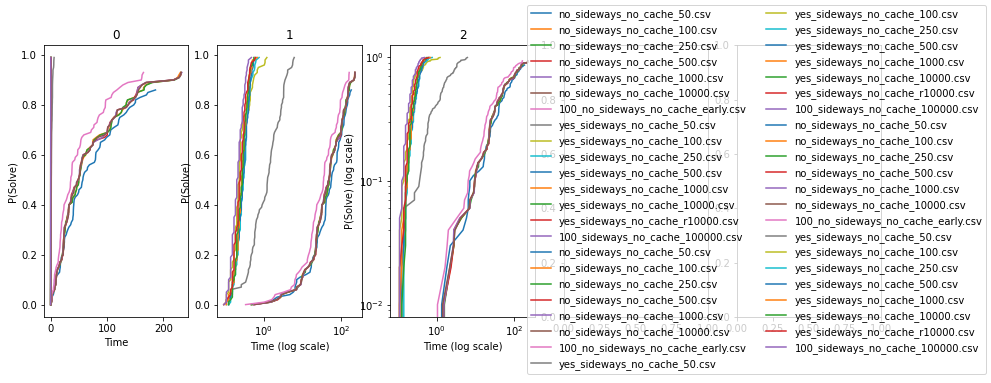

In [84]:
def get_plottable_columns(df:pd.DataFrame,\
                          x_column_name:str)->tuple:
    """
    Returns k - the number of items
    a pandas data frame with the X and y axis
    """
    k = df.shape[0]    # Number of experiments
    df = df[df['Cost'] == 0]
    df = df[[x_column_name]]
    
    # drop all other columns except the column that we're interested in that
    # measures the number of calls, or time
    df = df.sort_values(by=[x_column_name])
    df = df.reset_index()
    
    # Now add the X axis which is i/k for all i in k_prime
    k_prime = df.shape[0]
    x = np.array([i/k for i in range(k_prime)])
    x = pd.Series(x)
    df['P_Solve'] = x
    
    return k, df
    

def plot_one_file(filename:str,\
                  ax,\
                  x_column_name,
                  legend_text,
                  plot_failure_rate:bool=False,
                  multiplication_factor:int=1):
    #print(f"Reading {filename}")
    df = read_file(filename)
    k, df = get_plottable_columns(df, x_column_name)
    y = df['P_Solve'].to_numpy()
    if plot_failure_rate:
        y = 1 - y
    x = df[x_column_name].to_numpy()
    x = x * multiplication_factor
    p = ax.plot(x, y, label=legend_text)
    return None

def plot_entire_run(run_dict:dict,\
                   x_column_name:str,
                   plot_type:str='regular',
                   plot_failure_rate:bool=False,
                   title:str="",
                   multiplication_factor:int=1,
                   legend_position:str='figure'):
    assert(plot_type == 'regular' or plot_type == 'loglog' or plot_type == 'semilog')
    assert(legend_position == 'figure' or legend_position == 'ax')
    fig, ax = plt.subplots(1)
    iters_list = sorted(list(run_dict.keys()))
    for i in iters_list:
        plot_one_file(run_dict[i], ax, x_column_name, f"iters={i}",\
                      plot_failure_rate, multiplication_factor)
    if legend_position == 'ax': 
        ax.legend()
    else:
        fig.legend()
    ax.set_title(title)
    xlabel = x_column_name
    if plot_type == 'loglog' or plot_type == 'semilog':
        xlabel = xlabel + " (log scale)"
        ax.set_xscale('log')
    ax.set_xlabel(xlabel)
    ylabel = "P(Solve)"
    if plot_failure_rate:
        ylabel = "P(Fail)"
    if plot_type == 'loglog':
        ylabel = ylabel + " (log scale)"
        ax.set_yscale('log')
    ax.set_ylabel(ylabel)
    return None

def plot_entire_run_all(run_dict:dict,
                       x_column_name:str,
                       plot_failure_rate:bool=False,
                       title:str="",
                       multiplication_factor:int=1,
                       legend_position:str='figure'):
    assert(legend_position == 'figure' or legend_position == 'ax')
    fig, ax = plt.subplots(1, 3)
    iters_list = sorted(list(run_dict.keys()))
    for i in iters_list:
        for j in range(3):
            if 'figure' == legend_position:
                leg_str = f"{j}-iters={i}"
            else:
                leg_str = f"iters={i}"
            plot_one_file(run_dict[i], ax[j], x_column_name, leg_str,\
                      plot_failure_rate, multiplication_factor)
    if legend_position == 'ax': 
        for j in range(3):
            ax[j].legend()
    else:
        fig.legend()
    ylabel = "P(Solve)"
    if plot_failure_rate:
        ylabel = "P(Fail)"
    ax[0].set_title('0')
    ax[1].set_title('1')
    ax[2].set_title('2')
    ax[0].set_xlabel(x_column_name)
    ax[1].set_xlabel(x_column_name + " (log scale)")
    ax[2].set_xlabel(x_column_name + " (log scale)")
    ax[0].set_ylabel(ylabel)
    ax[1].set_ylabel(ylabel)
    ax[2].set_ylabel(f'{ylabel} (log scale)')
    
    ax[1].set_xscale('log')
    ax[2].set_xscale('log')
    ax[2].set_yscale('log')
    
    fig.suptitle(title)
    
def plot_multiple_dicts(run_dict_a:list,
                       x_column_name:str,
                       plot_failure_rate:bool=False,
                       title:str="",
                       multiplication_factor:int=1,
                       legend_position:str='figure'):
    assert(legend_position == 'figure' or legend_position == 'ax')
    fig, ax = plt.subplots(1, 5)
    for run_dict in run_dict_a:
        iters_list = sorted(list(run_dict.keys()))
        for i in iters_list:
            for j in range(3):
                plot_one_file(run_dict[i], ax[j], x_column_name, run_dict[i],\
                          plot_failure_rate, multiplication_factor)
    if legend_position == 'ax': 
        for j in range(3):
            ax[j].legend()
    else:
        fig.legend(ncol=2)
    ylabel = "P(Solve)"
    if plot_failure_rate:
        ylabel = "P(Fail)"
    ax[0].set_title('0')
    ax[1].set_title('1')
    ax[2].set_title('2')
    ax[0].set_xlabel(x_column_name)
    ax[1].set_xlabel(x_column_name + " (log scale)")
    ax[2].set_xlabel(x_column_name + " (log scale)")
    ax[0].set_ylabel(ylabel)
    ax[1].set_ylabel(ylabel)
    ax[2].set_ylabel(f'{ylabel} (log scale)')
    
    ax[1].set_xscale('log')
    ax[2].set_xscale('log')
    ax[2].set_yscale('log')
    
    fig.suptitle(title)
    

def plot_multiple_time(run_dict_a:list,
                    plot_type:str='regular',
                    title:str="",
                    plot_failure_rate:bool=False,
                    legend_position:str='ax'):
    return plot_multiple_dicts(run_dict_a, 'Time',\
                plot_failure_rate=plot_failure_rate,\
                title=title,multiplication_factor=1,\
                legend_position=legend_position)
    
def plot_operations(run_dict:dict,\
                   plot_type:str='regular',
                   title:str="",
                   plot_failure_rate:bool=False,
                   legend_position:str='ax'):
    return plot_entire_run(run_dict, 'HeuristicQueenCalls',\
                plot_type=plot_type, plot_failure_rate=plot_failure_rate,\
                title=title,multiplication_factor=54,\
                legend_position=legend_position)
    
def plot_time(run_dict:dict,\
                plot_type:str='regular',
                title:str="",
                plot_failure_rate:bool=False,
                legend_position:str='ax'):
    return plot_entire_run(run_dict, 'Time',\
                plot_type=plot_type, plot_failure_rate=plot_failure_rate,\
                title=title,multiplication_factor=1,\
                legend_position=legend_position)

    
def plot_operations_all(run_dict:dict,
                            title:str="",
                            plot_failure_rate:bool=False,
                            legend_position:str='ax'):
    plot_entire_run_all(run_dict, 'HeuristicQueenCalls',\
                           plot_failure_rate=plot_failure_rate, title=title,
                           multiplication_factor=54,
                           legend_position=legend_position)
    
def plot_time_all(run_dict:dict,
                            title:str="",
                            plot_failure_rate:bool=False,
                            legend_position:str='ax'):
    plot_entire_run_all(run_dict, 'Time',\
                           plot_failure_rate=plot_failure_rate, title=title,
                           multiplication_factor=1,
                           legend_position=legend_position)

### Run Time Diagrams<a id="RTD"></a>

### Sideways Moves Allowed<a id='RTDSidewaysAllowed'></a>

#### Run Time Distribution - P(Solve)

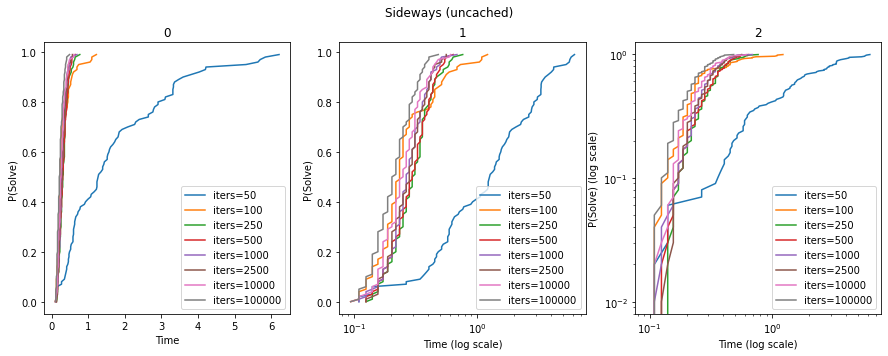

In [36]:
plot_time_all(yes_sideways_no_cache, "Sideways (uncached)", plot_failure_rate=False, legend_position='ax')

#### Run Time Distribution (Failure Rate)

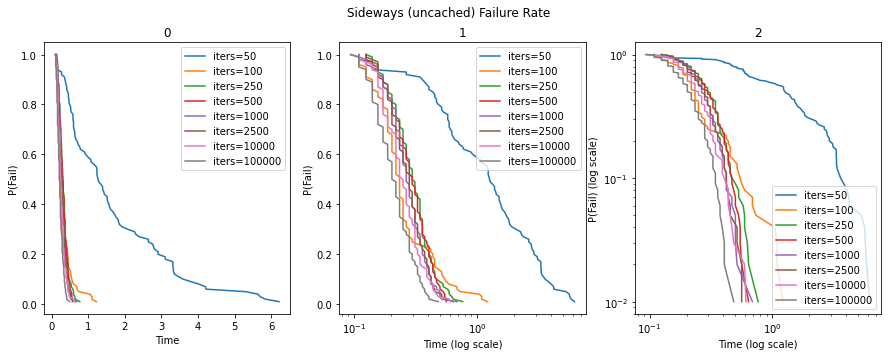

In [39]:
plot_time_all(yes_sideways_no_cache, "Sideways (uncached) Failure Rate", plot_failure_rate=True, legend_position='ax')

#### Run Length Distribution - P(Solve)

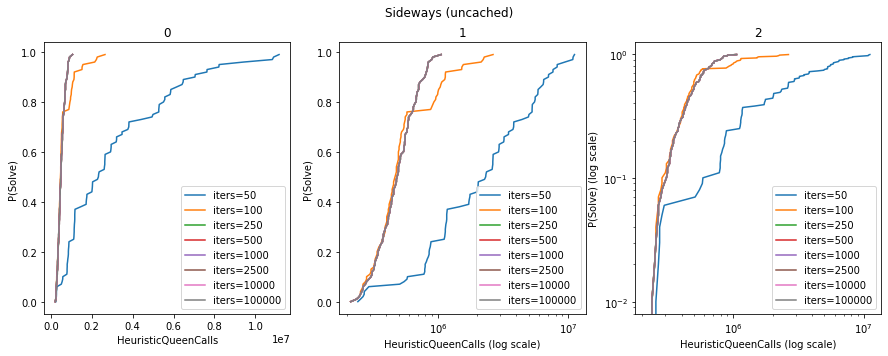

In [40]:
plot_operations_all(yes_sideways_no_cache, "Sideways (uncached)", plot_failure_rate=False, legend_position='ax')

#### Run Length Distribution - Failulre Rate

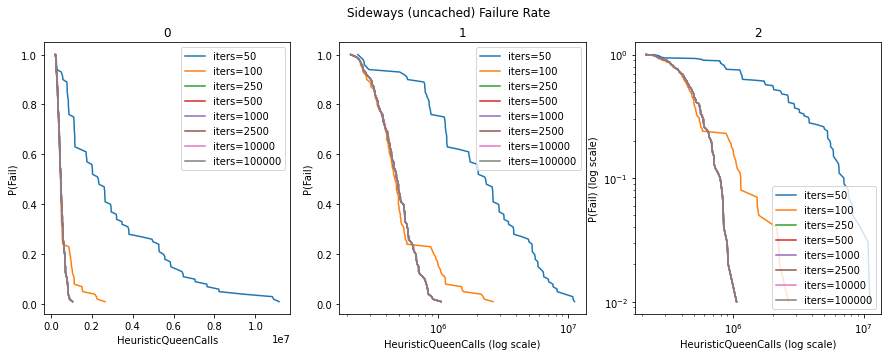

In [41]:
plot_operations_all(yes_sideways_no_cache, "Sideways (uncached) Failure Rate", plot_failure_rate=True, legend_position='ax')

### Sideways Not Allowed (uncached)<a id="RTDSidewaysDisallowed"></a>

#### Run Time Diagram P(Solve)

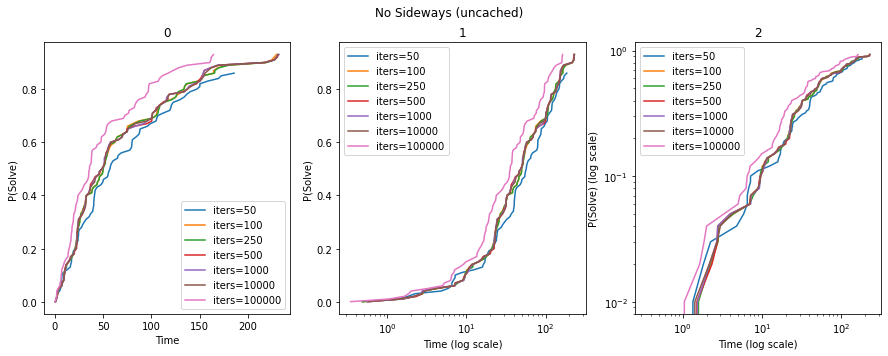

In [42]:
plot_time_all(no_sideways_no_cache, "No Sideways (uncached)", plot_failure_rate=False, legend_position='ax')

#### Run Time Diagram - Failure Rate

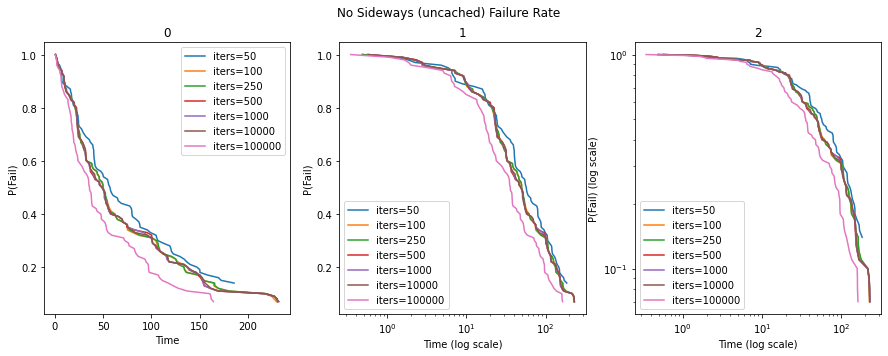

In [43]:
plot_time_all(no_sideways_no_cache, "No Sideways (uncached) Failure Rate", plot_failure_rate=True, legend_position='ax')

#### Run Length Diagram - P(Solve)

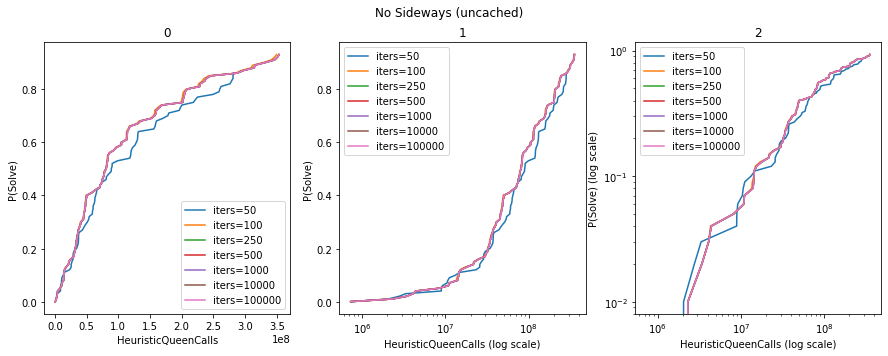

In [44]:
plot_operations_all(no_sideways_no_cache, "No Sideways (uncached)", plot_failure_rate=False, legend_position='ax')

Run Length Distribution (Failure Rate)

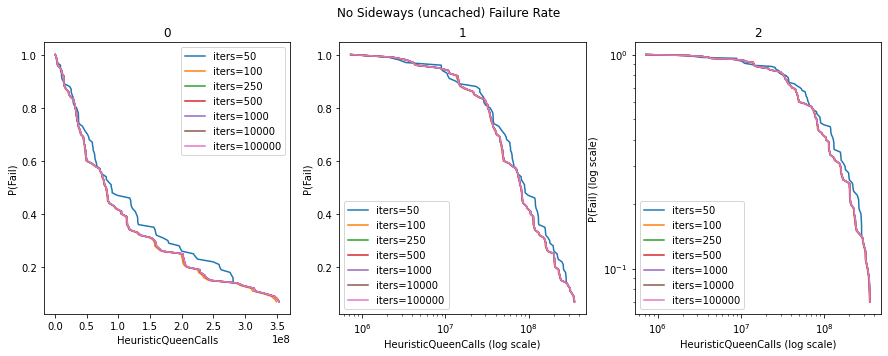

In [45]:
plot_operations_all(no_sideways_no_cache, "No Sideways (uncached) Failure Rate", plot_failure_rate=True, legend_position='ax')

### Sideways Moves Allowed, with Caching<a id="RTDSidewaysCached"></a>

#### Run Time Distribution P(Solve)

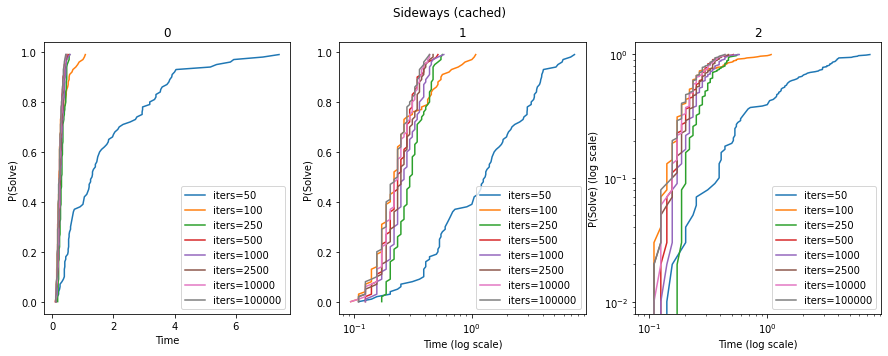

In [46]:
plot_time_all(yes_sideways_yes_cache, "Sideways (cached)", plot_failure_rate=False, legend_position='ax')

#### Run Time Distribution (Failure Rate)

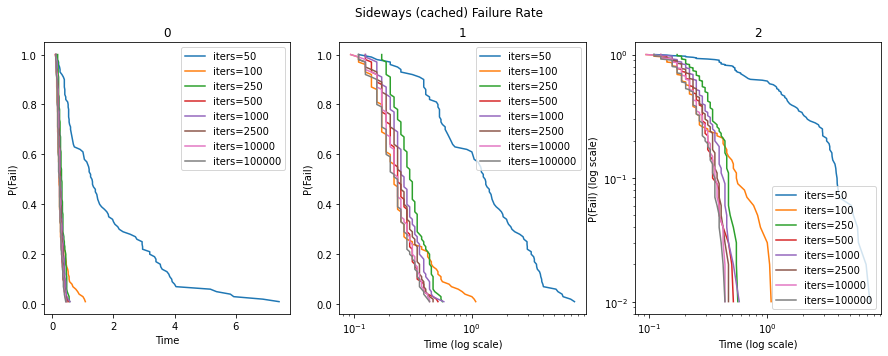

In [49]:
plot_time_all(yes_sideways_yes_cache, "Sideways (cached) Failure Rate", plot_failure_rate=True, legend_position='ax')

#### Run Length Distribution P(solve)

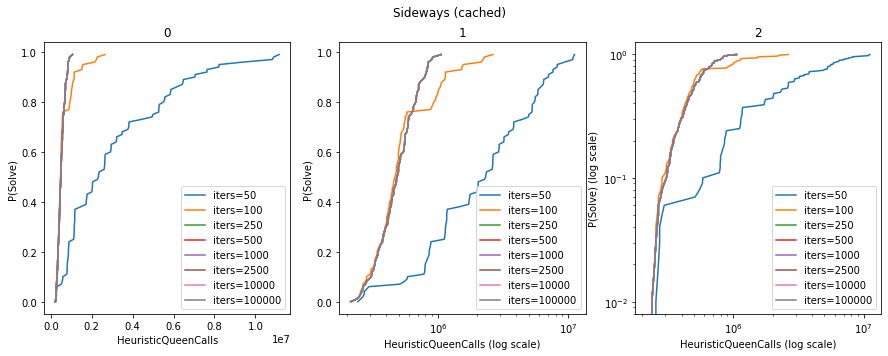

In [48]:
plot_operations_all(yes_sideways_yes_cache, "Sideways (cached)", plot_failure_rate=False, legend_position='ax')

#### Run Length Distribution (Failure Rate)

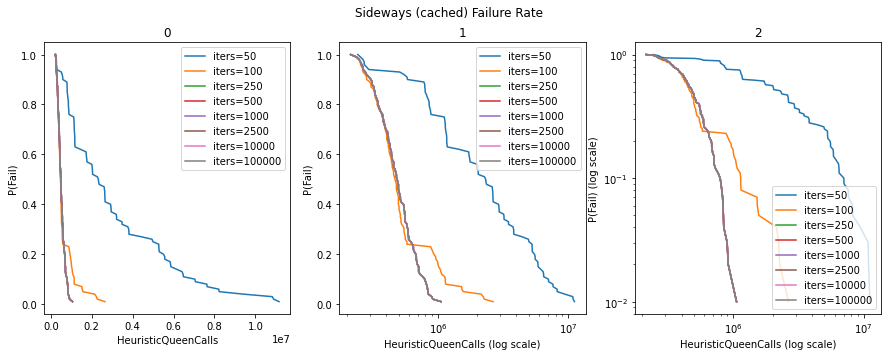

In [50]:
plot_operations_all(yes_sideways_yes_cache, "Sideways (cached) Failure Rate", plot_failure_rate=True, legend_position='ax')

### Cached, without sideways moves<a id='RTDNoSidewaysCached'></a>

#### Run Time Diagram P(Solve)

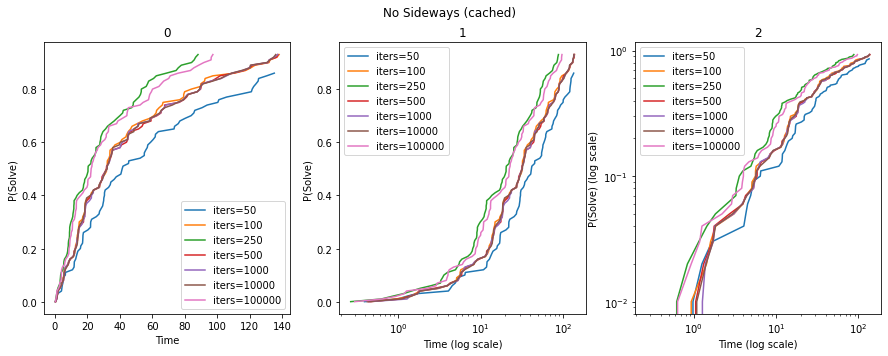

In [51]:
plot_time_all(no_sideways_yes_cache, "No Sideways (cached)", plot_failure_rate=False, legend_position='ax')

#### Run Time Diagram Failure Rate

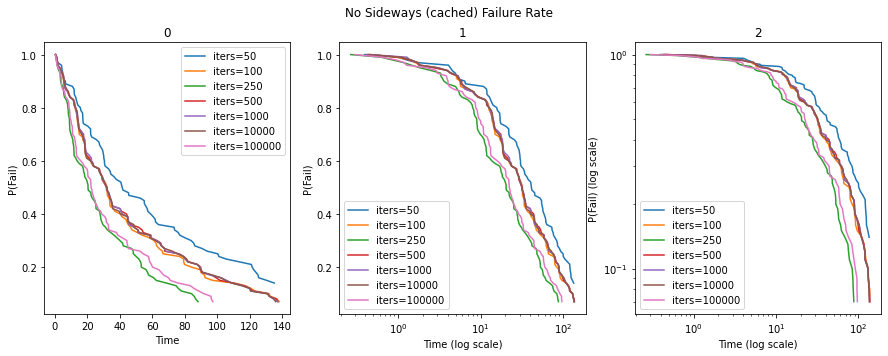

In [52]:
plot_time_all(no_sideways_yes_cache, "No Sideways (cached) Failure Rate", plot_failure_rate=True, legend_position='ax')

#### Run Length Distribution P(Solve)

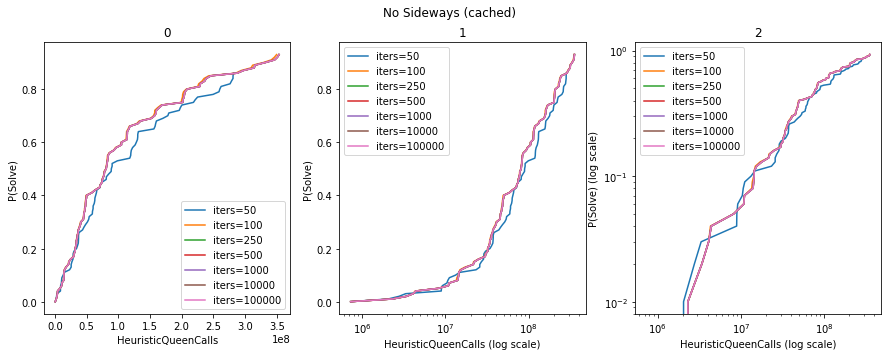

In [53]:
plot_operations_all(no_sideways_yes_cache, "No Sideways (cached)", plot_failure_rate=False, legend_position='ax')

#### Run Length Distribution P(Fail)

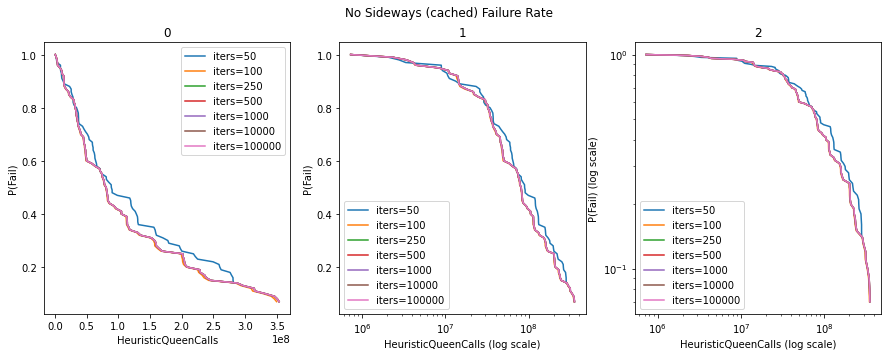

In [54]:
plot_operations_all(no_sideways_yes_cache, "No Sideways (cached) Failure Rate", plot_failure_rate=True, legend_position='ax')

## Comaprisons of different schemes<a id="COMP"></a>

### Cached vs Non Cached (Sideways allowed)<a id="cvnc_side"></a>

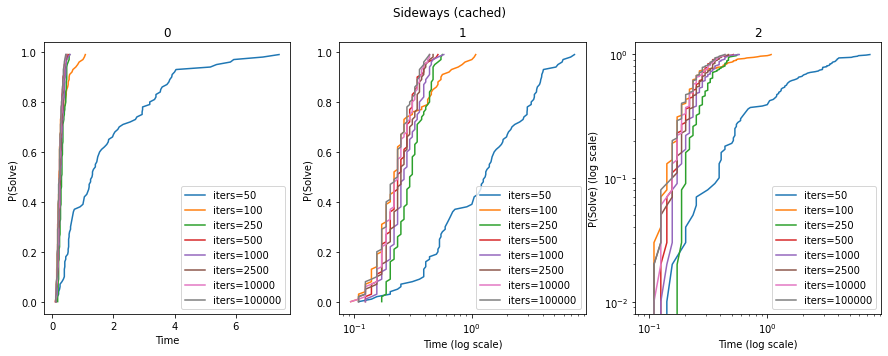

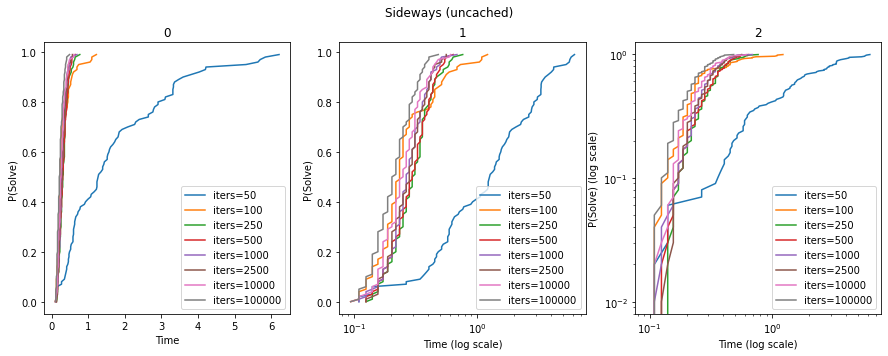

In [57]:
plot_time_all(yes_sideways_yes_cache, "Sideways (cached)", plot_failure_rate=False, legend_position='ax')
plot_time_all(yes_sideways_no_cache, "Sideways (uncached)", plot_failure_rate=False, legend_position='ax')

### Cached vs Non Cached (Sideways not allowed)<a id="cvnc_nside"></a>

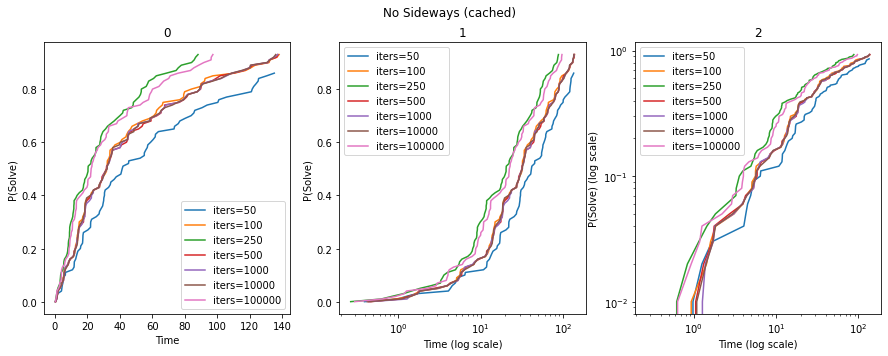

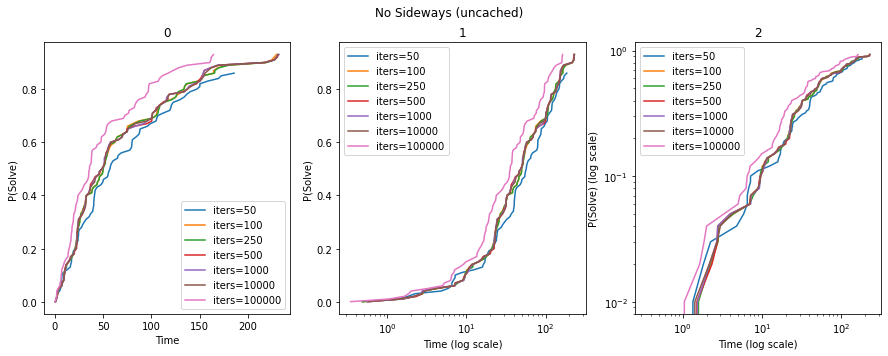

In [58]:
plot_time_all(no_sideways_yes_cache, "No Sideways (cached)", plot_failure_rate=False, legend_position='ax')
plot_time_all(no_sideways_no_cache, "No Sideways (uncached)", plot_failure_rate=False, legend_position='ax')

### Sideways vs non-Sideways, no cache<a id="side_vs_no_side_nc"></a>

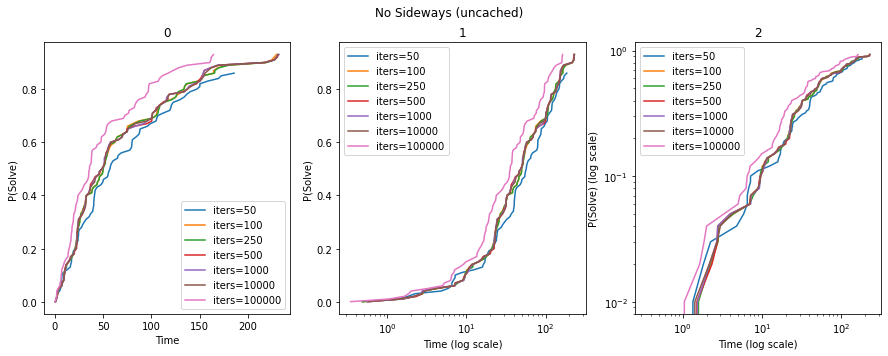

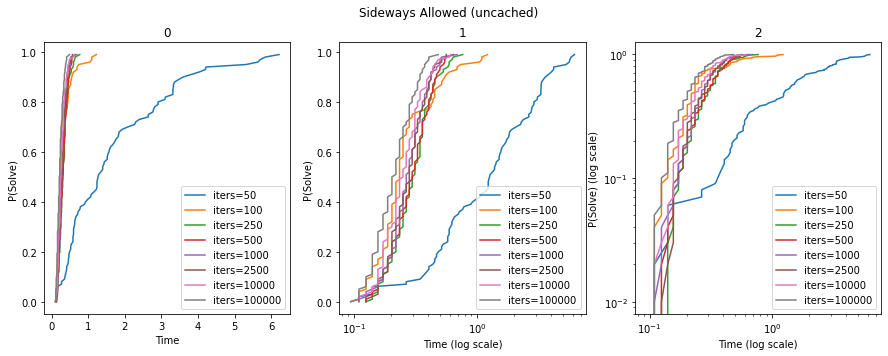

In [60]:
plot_time_all(no_sideways_no_cache, "No Sideways (uncached)", plot_failure_rate=False, legend_position='ax')
plot_time_all(yes_sideways_no_cache, "Sideways Allowed (uncached)", plot_failure_rate=False, legend_position='ax')

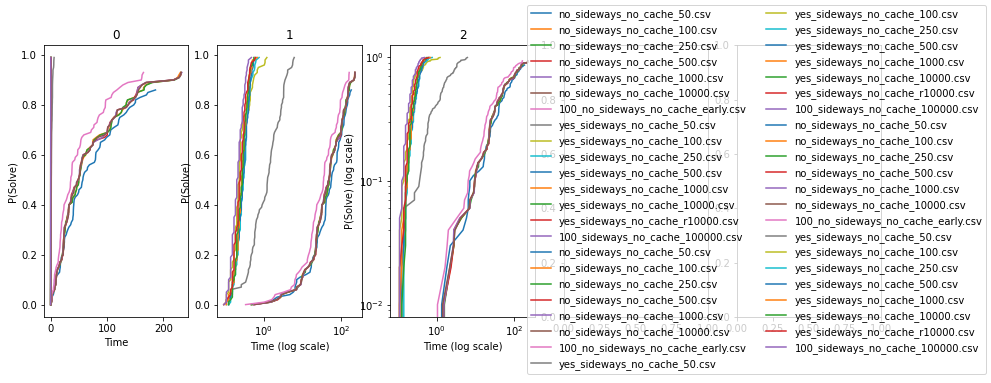

In [85]:
plot_multiple_time([no_sideways_no_cache, yes_sideways_no_cache],\
                  "Sideways vs No Sideways", plot_failure_rate=False, legend_position='figure')
    